In [1]:
# imports
import numpy as np
import numpy.random as rd
import numpy.linalg as linalg
import math
from scipy.optimize import linprog
import matplotlib.pyplot as plt
from hmmlearn import hmm

In [2]:
def sample(prob): # BS can be done
    r = rd.random();i = 0
    while r > prob[i]:
        r-=prob[i]
        i+=1
    return i

def bernoulli(prob):
    if rd.random() > prob:
        return 1.0
    return 0.0

def row_normalize(arr):
    arr = np.array(arr,float)
    for i in range(np.shape(arr)[0]):
        arr[i] = arr[i]/np.sum(arr[i])
    return arr

def normalize(arr):
    arr = np.array(arr,float)
    return arr/np.sum(arr)

def dot(x,y):
    return np.sum(np.multiply(x,y))

def steady_state_prob(matrix):
    """
    This function calculates relative throughput from a probability matrix
    :param matrix: the probability matrix
    :return: A list of relative throughput values
    """
    a_list = []
    b_list = []
    for v in matrix:
        a_list.append(1)
        b_list.append(0)
    b_list.append(1)
    A = np.append(np.transpose(matrix) - np.identity(len(matrix)), [a_list], axis=0)
    b = np.transpose(np.array(b_list))
    return np.linalg.solve(np.transpose(A).dot(A), np.transpose(A).dot(b))

In [3]:
# example 2
en = 6
ch = 8
P = np.array([.3,.1,.2,.4,.3,.1,.3,.3])/2
E = np.array([[.4,.6,.4,.3,.1,.35,.3,.4],[.3,.4,.4,.3,.3,.35,.25,.4],[.3,.2,.1,.4,.3,.4,.4,.3],[.4,.3,.3,.5,.6,.4,.55,.35],[.2,.4,.1,.3,.4,.4,.3,.1],[.4,.6,.4,.3,.6,.4,.3,.1]])/2
R = np.array([4.,3.5,4.,8.,2.,3.])
tol = .2
print(P)
print(E)
print(R)
ub = np.sum(E*P,axis=1)
print(min(ub))

[0.15 0.05 0.1  0.2  0.15 0.05 0.15 0.15]
[[0.2   0.3   0.2   0.15  0.05  0.175 0.15  0.2  ]
 [0.15  0.2   0.2   0.15  0.15  0.175 0.125 0.2  ]
 [0.15  0.1   0.05  0.2   0.15  0.2   0.2   0.15 ]
 [0.2   0.15  0.15  0.25  0.3   0.2   0.275 0.175]
 [0.1   0.2   0.05  0.15  0.2   0.2   0.15  0.05 ]
 [0.2   0.3   0.2   0.15  0.3   0.2   0.15  0.05 ]]
[4.  3.5 4.  8.  2.  3. ]
0.13


In [18]:
# example 2
en = 12
ch = 10
P = np.array([.3,.1,.15,.35,.2,.1,.25,.2,.1,.25])/2
E = np.array([[.4,.6,.4,.3,.1,.35,.3,.4,.4,.3],[.3,.4,.4,.3,.3,.35,.25,.4,.4,.25],[.3,.2,.1,.4,.3,.4,.4,.3,.35,.55],[.45,.5,.4,.55,.7,.45,.55,.35,.35,.55],[.2,.4,.1,.3,.4,.4,.3,.1,.1,.3],[.4,.6,.4,.3,.6,.4,.3,.1,.25,.4],[.4,.6,.4,.3,.1,.35,.3,.4,.1,.3],[.55,.45,.45,.3,.3,.35,.25,.4,.4,.1],[.3,.2,.1,.4,.3,.4,.4,.3,.2,.4],[.4,.3,.3,.5,.6,.4,.4,.35,.4,.6],[.2,.4,.1,.3,.4,.4,.3,.1,.4,.25],[.4,.6,.4,.3,.6,.4,.3,.1,.3,.4]])/2
R = np.array([4.,3.5,4.,8,2.,3.,4.,3.5,4.,6.,2.,3.])
tol = .2
print(P)
print(E)
print(R)
ub = np.sum(E*P,axis=1)
print(min(ub))

[0.15  0.05  0.075 0.175 0.1   0.05  0.125 0.1   0.05  0.125]
[[0.2   0.3   0.2   0.15  0.05  0.175 0.15  0.2   0.2   0.15 ]
 [0.15  0.2   0.2   0.15  0.15  0.175 0.125 0.2   0.2   0.125]
 [0.15  0.1   0.05  0.2   0.15  0.2   0.2   0.15  0.175 0.275]
 [0.225 0.25  0.2   0.275 0.35  0.225 0.275 0.175 0.175 0.275]
 [0.1   0.2   0.05  0.15  0.2   0.2   0.15  0.05  0.05  0.15 ]
 [0.2   0.3   0.2   0.15  0.3   0.2   0.15  0.05  0.125 0.2  ]
 [0.2   0.3   0.2   0.15  0.05  0.175 0.15  0.2   0.05  0.15 ]
 [0.275 0.225 0.225 0.15  0.15  0.175 0.125 0.2   0.2   0.05 ]
 [0.15  0.1   0.05  0.2   0.15  0.2   0.2   0.15  0.1   0.2  ]
 [0.2   0.15  0.15  0.25  0.3   0.2   0.2   0.175 0.2   0.3  ]
 [0.1   0.2   0.05  0.15  0.2   0.2   0.15  0.05  0.2   0.125]
 [0.2   0.3   0.2   0.15  0.3   0.2   0.15  0.05  0.15  0.2  ]]
[4.  3.5 4.  8.  2.  3.  4.  3.5 4.  6.  2.  3. ]
0.13


In [33]:
# random example generator
en = 15
ch = 20
P = normalize(rd.rand(ch))
E = rd.rand(en,ch)/2
R = np.array(rd.randint(low=1,high=2*en,size=en),float)
# print(P)
# print(E)
print(R)
ub = np.sum(E*P,axis=1)
print(min(ub))

[ 7.  1. 22.  4.  7.  8. 18. 10. 14.  9. 26. 18. 10. 24.  6.]
0.11122504080443357


In [34]:
tol = .2
ltemp = linprog(c = -1*R, A_ub = [ub], b_ub = [tol],A_eq = np.ones((1,en)),b_eq = [1.0],method='simplex')
print(tol)
print(dot(ltemp.x,R), np.sum(ltemp.x),ltemp.con, ltemp.success, dot(ltemp.x,ub))
org_x = ltemp.x
print(ltemp.x)

0.2
24.028415239851086 0.9999999999999999 [1.11022302e-16] True 0.2
[0.         0.         0.49289619 0.         0.         0.
 0.         0.         0.         0.         0.50710381 0.
 0.         0.         0.        ]


In [35]:
xub = E.transpose();tol_arr = [tol]*ch
ltemp = linprog(c=np.zeros(en),A_ub = xub,b_ub=tol_arr,A_eq = np.ones((1,en)),b_eq = [1.0],method='revised simplex',options={'tol': 1.0e-3})
print(ltemp.success)
x0 = np.transpose(row_normalize([ltemp.x])) # noise to safe to avoid singular matrices, 1.0e-2 is working
norm_x0 = linalg.norm(x0)
e0 = x0/norm_x0 # safe vector
e0_trans = e0.transpose()
en0 = sample(x0.transpose()[0])
c_arr = []
for i in range(500):
    c_arr.append(1.0-bernoulli(E[sample(x0)][sample(P)]))
c0 = np.mean(c_arr)
print(np.sum(x0))
print(x0.flatten())
print(c0,dot(x0.flatten(),R))

False
0.9999999999999999
[0.         0.0881258  0.34377121 0.13798258 0.         0.
 0.10194083 0.         0.1139201  0.         0.         0.01028674
 0.         0.13432528 0.06964746]
0.188 15.459691940882331


In [36]:
# OPLB
# parameters
reg = 0.1 # lambda > 0, regualarization param
conf = 0.1 # delta >= 0, <= 1, confidence prob -> with 1-del prob tolerance holds
alfa_c = 0.1 # >= 1, ellipse radii, best : 0.001
Sa = 1.;La = 1.;Ra = 1. # assumption parameters
R_sum = np.sum(R)
Rn_trans = R/R_sum
Rn = np.transpose([Rn_trans])
# x = [np.transpose(row_normalize([np.ones(en)]))]
x = [x0]
r = [dot(x[-1],Rn)*R_sum];c = [c0]
b = []; enc = [];chnl = []
avg_rate = [dot(x[0],Rn)*R_sum]
# algo
iop = np.identity(en) - (np.matmul(x0,x0.transpose())/pow(norm_x0,2.0))
sigopt = reg*iop; uopt = 0.0
val = 1 - e0*np.sum(e0); val = np.array([[i for i in val.flatten()]])
gama =  1.0/float(2.0*en)
alfa_c = alfa_c/math.sqrt(float(en))
for t in range(1,10000):
    enc.append(sample(x[-1].transpose()[0]))
    chnl.append(sample(P))
    b.append(bernoulli(E[enc[-1]][chnl[-1]]))
    r.append(dot(x[-1],Rn))
    c.append(1.0 - b[-1])  # c.append(dot(x[-1],np.matmul(E,yt)))
    copt = c[-1] - (dot(x[-1],e0)/norm_x0)*c[0]
    xopt = x[-1] - (dot(x[-1],e0)*e0)
    sigopt += np.matmul(xopt,xopt.transpose())
    uopt += (copt*xopt)
    muopt = np.matmul(linalg.pinv(sigopt),uopt) # (inverse is blowing up, singular matrices) so did pseudo(SVD)
    ub = ((c0/norm_x0)*e0_trans)+muopt.transpose()-(dot(e0,muopt)*e0_trans)
    betat = Ra*math.sqrt(en*math.log10((1+(t-1)*La*La/reg)/conf))+math.sqrt(reg)*Sa # used log10
    # print(np.mean(ub),alfa_c*betat*np.mean(val),tol+(alfa_c*betat*err))
    alfact = alfa_c # /math.pow(float(t),0.5)
    try:
        ltemp = linprog(c = -1*Rn_trans, A_ub = ub + alfact*betat*val, b_ub = [tol+(alfact*betat*gama)],A_eq = np.ones((1,en)),b_eq = [1.0],method='revised simplex',options={'tol': 1.0e-2})
    except:
        print(t,'skipped')
        break
        continue
    # print(ub[0])
    x.append(np.transpose(row_normalize([ltemp.x])))
    avg_rate.append(dot(x[-1],Rn)*R_sum)
    print(t,round(avg_rate[-1],5),round(1.0-np.mean(b),4),ltemp.success,end='\n')
    # print(np.mean(ub),alfa_c*betat*np.mean(val))
# print(copt)
# print(xopt)
# print(sigopt)
# print(uopt)
# print(muopt)
# print(ub,betat)
error_plot_oplb = 1.0 - np.copy(b)
for i in range(1,len(error_plot_oplb)):
    error_plot_oplb[i] += (error_plot_oplb[i-1]*(i-1))
    error_plot_oplb[i] =error_plot_oplb[i]/i
rate_plot_oplb = np.copy(avg_rate)
for i in range(1,len(rate_plot_oplb)):
    rate_plot_oplb[i] += (rate_plot_oplb[i-1]*(i-1))
    rate_plot_oplb[i] =rate_plot_oplb[i]/i

1 26.0 0.0 True
2 26.0 0.0 True
3 26.0 0.0 True
4 24.15686 0.25 True
5 24.72878 0.2 True
6 24.86335 0.1667 True
7 24.94057 0.1429 True
8 24.15457 0.25 True
9 22.91163 0.3333 True
10 22.58333 0.4 True
11 21.72479 0.4545 True
12 21.38506 0.5 True
13 21.96356 0.4615 True
14 19.05283 0.5 True
15 19.46437 0.4667 True
16 19.70695 0.4375 True
17 19.54096 0.4706 True
18 19.80996 0.4444 True
19 19.93616 0.4211 True
20 20.01535 0.4 True
21 19.03956 0.4286 True
22 21.54318 0.4091 True
23 22.72862 0.3913 True
24 23.11059 0.375 True
25 23.33529 0.36 True
26 23.49419 0.3462 True
27 23.61706 0.3333 True
28 23.7173 0.3214 True
29 23.38323 0.3448 True
30 23.02338 0.3667 True
31 23.15984 0.3548 True
32 23.26815 0.3438 True
33 23.35809 0.3333 True
34 23.43517 0.3235 True
35 23.50275 0.3143 True
36 23.56306 0.3056 True
37 23.61765 0.2973 True
38 23.43719 0.3158 True
39 23.49201 0.3077 True
40 23.54188 0.3 True
41 23.58772 0.2927 True
42 23.63022 0.2857 True
43 23.66993 0.2791 True
44 23.70726 0.2727 True


In [39]:
# parameters
reg = 0.1 # lambda > 0, regualarization param
conf = 0.1 # delta >= 0, <= 1, confidence prob -> with 1-del prob tolerance holds
alfa_c = 0.001 # >= 1, ellipse radii, best : 0.001
Sa = 1.;La = 1.;Ra = 1. # assumption parameters
R_sum = np.sum(R)
Rn_trans = R/R_sum
Rn = np.transpose([Rn_trans])
# x = [np.transpose(row_normalize([np.ones(en)]))]
x = [x0]
r = [dot(x[-1],Rn)];c = [c0]
b = []; enc = [];chnl = []
avg_rate = []
# algo
iop = np.identity(en) - (np.matmul(x0,x0.transpose())/pow(norm_x0,2.0))
sigopt = reg*iop; uopt = 0.0
tolx = tol
for t in range(1,10000):
    enc.append(sample(x[-1].transpose()[0]))
    chnl.append(sample(P))
    b.append(bernoulli(E[enc[-1]][chnl[-1]]))
    r.append(dot(x[-1],Rn))
    c.append(1.0 - b[-1])  # c.append(dot(x[-1],np.matmul(E,yt)))
    copt = c[-1] - (dot(x[-1],e0)/norm_x0)*c[0]
    xopt = x[-1] - (dot(x[-1],e0)*e0)
    sigopt += np.matmul(xopt,xopt.transpose())
    uopt += (copt*xopt)
    muopt = np.matmul(linalg.pinv(sigopt),uopt) # (inverse is blowing up, singular matrices) so did pseudo(SVD)
    ub = ((c0/norm_x0)*e0_trans)+muopt.transpose()-(dot(e0,muopt)*e0_trans)
    betat = Ra*math.sqrt(en*math.log10((1+(t-1)*La*La/reg)/conf))+math.sqrt(reg)*Sa # used log10
    val = alfa_c*betat*linalg.norm(xopt)
    if t > 100:
        tolx = 2.0*tol - np.mean(c)
    try:
        ltemp = linprog(c = -1*Rn_trans, A_ub = ub, b_ub = [tolx-val],A_eq = np.ones((1,en)),b_eq = [1.0],method='revised simplex',options={'tol': 1.0e-2})
    except:
        print(t,'skipped')
        break
        continue
    # print(ub[0])
    x.append(np.transpose(row_normalize([ltemp.x])))
    avg_rate.append(dot(x[-1],Rn)*R_sum)
    print(t,round(avg_rate[-1],5),round(1.0-np.mean(b),4),ltemp.success,end=' ')
    # print(np.mean(ub),alfa_c*betat*np.mean(val))
    print(round(val,5),round(alfa_c*betat*linalg.norm(x[-1] - (dot(x[-1],e0)*e0)),5))
# print(copt)
# print(xopt)
# print(sigopt)
# print(uopt)
# print(muopt)
# print(ub,betat)
error_plot_oplb_adap = 1.0 - np.copy(b)
for i in range(1,len(error_plot_oplb_adap)):
    error_plot_oplb_adap[i] += (error_plot_oplb_adap[i-1]*(i-1))
    error_plot_oplb_adap[i] =error_plot_oplb_adap[i]/i
rate_plot_oplb_adap = np.copy(avg_rate)
for i in range(1,len(rate_plot_oplb_adap)):
    rate_plot_oplb_adap[i] += (rate_plot_oplb_adap[i-1]*(i-1))
    rate_plot_oplb_adap[i] =rate_plot_oplb_adap[i]/i

1 26.0 0.0 True 0.0 0.00419
2 26.0 0.0 True 0.00585 0.00585
3 24.35914 0.3333 True 0.00622 0.00498
4 24.9749 0.25 True 0.00515 0.00443
5 25.16379 0.2 True 0.00454 0.00464
6 25.28727 0.1667 True 0.00472 0.00487
7 25.38713 0.1429 True 0.00493 0.0051
8 25.47724 0.125 True 0.00516 0.00534
9 25.56497 0.1111 True 0.00539 0.0056
10 25.65582 0.1 True 0.00565 0.00589
11 25.75547 0.0909 True 0.00593 0.00622
12 25.45062 0.1667 True 0.00626 0.00545
13 25.27405 0.2308 True 0.00549 0.00516
14 25.0744 0.2857 True 0.00518 0.00497
15 25.13331 0.2667 True 0.00499 0.00504
16 25.17822 0.25 True 0.00506 0.00511
17 24.99382 0.2941 True 0.00513 0.005
18 24.64028 0.3333 True 0.00502 0.00526
19 24.7764 0.3158 True 0.00527 0.00511
20 24.85763 0.3 True 0.00513 0.00508
21 24.91464 0.2857 True 0.00509 0.00507
22 24.95863 0.2727 True 0.00509 0.00509
23 24.99458 0.2609 True 0.0051 0.00511
24 25.02515 0.25 True 0.00512 0.00513
25 25.05189 0.24 True 0.00514 0.00515
26 25.07582 0.2308 True 0.00517 0.00518
27 24.97785 0

15 20
[0.03902534 0.00467659 0.04611874 0.03536113 0.02130672 0.05899993
 0.06560984 0.07360494 0.04910769 0.0277036  0.06841575 0.0736496
 0.02119329 0.0716303  0.00435308 0.00886419 0.09204087 0.07597046
 0.06526261 0.09710536]
[[0.30632008 0.43915402 0.22965504 0.07471404 0.41450056 0.24926423
  0.05222859 0.11668899 0.13077355 0.16548914 0.30534518 0.33239139
  0.24624135 0.32076589 0.47933332 0.20855758 0.41798904 0.28119025
  0.1018839  0.23156263]
 [0.38522985 0.10209006 0.18672636 0.02882691 0.02992199 0.06236447
  0.45832075 0.44241907 0.00707628 0.25311038 0.05179072 0.3057686
  0.09266869 0.00564385 0.0883448  0.10002564 0.23870278 0.10097359
  0.48918914 0.09013477]
 [0.1982774  0.12027137 0.01668122 0.02192518 0.0999211  0.16732133
  0.02980344 0.29494853 0.08632963 0.18652926 0.04231697 0.07437607
  0.27280958 0.07939504 0.2561287  0.24253755 0.21711859 0.13815058
  0.01646975 0.01695629]
 [0.09001639 0.43610355 0.33875018 0.37344334 0.35205694 0.06700758
  0.49556844 0.0

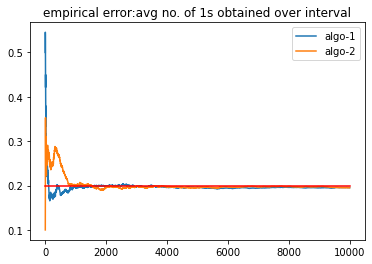

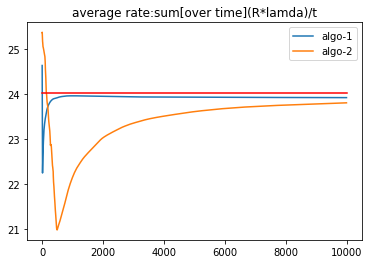

In [40]:
print(en,ch)
print(P)
print(E)
print(R)
print(tol)
stat = 10 # 15,20
end = 10000
org_rate = dot(org_x,R)
plt.plot(error_plot_oplb[stat:end])
plt.plot(error_plot_oplb_adap[stat:end])
plt.plot([0,len(error_plot_oplb[stat:end])],[tol,tol],'r')
plt.legend(['algo-1', 'algo-2'])
plt.title('empirical error:avg no. of 1s obtained over interval')
plt.show()
plt.plot(rate_plot_oplb[stat:end])
plt.plot(rate_plot_oplb_adap[stat:end])
plt.legend(['algo-1', 'algo-2'])
plt.plot([0,len(rate_plot_oplb[stat:end])],[org_rate,org_rate],'r')
plt.title('average rate:sum[over time](R*lamda)/t')
plt.show()

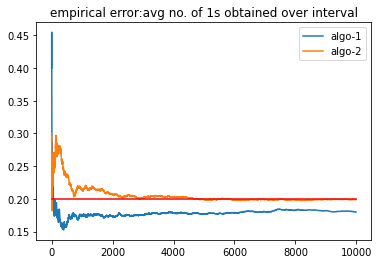

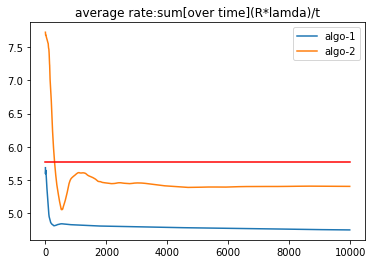

In [23]:
stat = 10 # 10, 12
end = 10000
org_rate = dot(org_x,R)
plt.plot(error_plot_oplb[stat:end])
plt.plot(error_plot_oplb_adap[stat:end])
plt.plot([0,len(error_plot_oplb[stat:end])],[tol,tol],'r')
plt.legend(['algo-1', 'algo-2'])
plt.title('empirical error:avg no. of 1s obtained over interval')
plt.show()
plt.plot(rate_plot_oplb[stat:end])
plt.plot(rate_plot_oplb_adap[stat:end])
plt.legend(['algo-1', 'algo-2'])
plt.plot([0,len(rate_plot_oplb[stat:end])],[org_rate,org_rate],'r')
plt.title('average rate:sum[over time](R*lamda)/t')
plt.show()

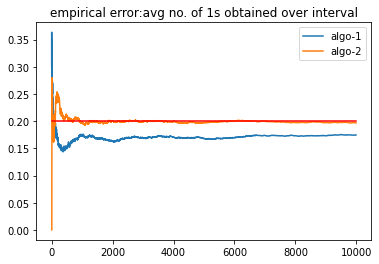

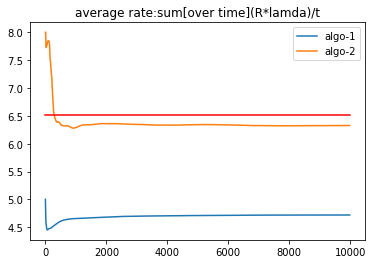

In [17]:
stat = 10 # 6,8
end = 10000
org_rate = dot(org_x,R)
plt.plot(error_plot_oplb[stat:end])
plt.plot(error_plot_oplb_adap[stat:end])
plt.plot([0,len(error_plot_oplb[stat:end])],[tol,tol],'r')
plt.legend(['algo-1', 'algo-2'])
plt.title('empirical error:avg no. of 1s obtained over interval')
plt.show()
plt.plot(rate_plot_oplb[stat:end])
plt.plot(rate_plot_oplb_adap[stat:end])
plt.legend(['algo-1', 'algo-2'])
plt.plot([0,len(rate_plot_oplb[stat:end])],[org_rate,org_rate],'r')
plt.title('average rate:sum[over time](R*lamda)/t')
plt.show()